In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os, sys
from dotenv import load_dotenv

In [3]:
rpath = os.path.abspath(r"..")
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import dataLoder
telecom_df = dataLoder()

In [4]:
from src.utils import plot_boxplots_side_by_side
from src.utils import replace_outliers_iqr

In [5]:
pd.DataFrame(telecom_df.isna().sum())

,0
Bearer Id,991
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


# handling missing values 
Removing null values from the user id column ['MSISDN/Number'] and the session id column ['Bearer Id']

In [6]:
telecom_filterd = telecom_df.dropna(subset = ['MSISDN/Number', 'Bearer Id'])


In [7]:
telecom_filterd.shape

(148506, 55)

In [8]:
pd.DataFrame(telecom_filterd.isna().sum())

,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,160


In [9]:
pd.DataFrame(telecom_filterd.dtypes)

,0
Bearer Id,float64
Start,object
Start ms,float64
End,object
End ms,float64
Dur. (ms),float64
IMSI,float64
MSISDN/Number,float64
IMEI,float64
Last Location Name,object


In [10]:
pd.set_option('display.max_columns', None)
telecom_filterd

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,313.0,9.0,63420.0,1393.0,16552848.0,162614.0,54.0,23.0,9.0,12.0,96.0,3.0,0.0,0.0,16388988.0,2672663.0,3380381.0,2355730.0,5.958779e+07,undefined,undefined,1080.0,314.0,852.0,NaN,2068.0,8.0,4801.0,8448.0,962097.0,31078.0,1139573.0,126061.0,3459965.0,820142.0,6550499.0,18003146.0,22468983.0,7149728.0,784

In [11]:
# telecom_filterd.columns

In [12]:
# Columns to fill with mean
columns_to_fill = [ 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI',
       'IMEI', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']


# Create a mask
mask = telecom_filterd.columns.isin(columns_to_fill)

In [13]:
telecom_filterd.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,120870.000000,120890.000000,148506.000000,148506.000000,6.074200e+04,5.237800e+04,147794.000000,147794.000000,147794.000000,147794.000000,147739.000000,147739.000000,147739.000000,147739.000000,6.737700e+04,6.703100e+04,1.485060e+05,1.485060e+05,1.485060e+05,51731.000000,56237.000000,55528.000000,19556.000000,60668.000000,37703.000000,147793.000000,147738.000000,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.014676e+19,499.205143,498.640196,1.050841e+05,2.082016e+14,4.190654e+10,4.850068e+13,106.199942,17.628232,13287.521413,1770.598488,2.100681e+07,7.710518e+05,92.869974,3.051680,1.713757,1.610370,98.533197,0.775300,0.148275,0.079221,1.161443e+08,3.286790e+06,1.837842e+06,1.414773e+06,1.050846e+08,998.386731,344.089710,819.851913,150.417417,975.832366,142.689017,3733.072662,4034.702825,1.795144e+06,32922.085512,5.751770e+06,2.056293e+06,1.791785e+06,467403.486896,1.163387e+07,1.100857e+07,1.162724e+07,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,4.111937e+07,4.546640e+08
std,2.893262e+18,288.563193,288.070129,8.107274e+04,1.524347e+10,2.450976e+12,2.243217e+13,587.069542,84.754524,23993.477306,4630.305972,1.831828e+08,2.669707e+07,13.033642,6.203029,4.160142,4.826791,4.641162,3.225483,1.629694,1.300348,9.711999e+08,1.973377e+07,5.717904e+06,4.661844e+06,8.107273e+07,2552.646273,1455.368627,1852.497345,1224.943965,1958.919399,999.191317,9202.519817,10193.069337,1.035470e+06,19008.988276,3.308755e+06,1.189939e+06,1.035956e+06,269981.911953,6.711236e+06,6.345625e+06,6.724994e+06,6.357930e+06,2.440043e+08,4.781967e+06,2.431639e+08,4.768806e+06,1.127844e+07,2.441791e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.824875e+04,2.082014e+14,3.365131e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.608100e+04,4.695250e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.151180e+05,2.483450e+04,1.484800e+04,2.149900e+04,5.824964e+07,20.000000,10.000000,26.000000,2.000000,40.000000,3.000000,87.000000,106.000000,8.990445e+05,16431.000000,2.883393e+06,1.023967e+06,8.926208e+05,233445.000000,5.833290e+06,5.515832e+06,5.778898

In [14]:

# fill null values with mean for specified columns
telecom_filterd.loc[:, columns_to_fill] = telecom_filterd.loc[:, columns_to_fill].fillna(telecom_filterd[columns_to_fill].mean())

In [15]:
pd.DataFrame(telecom_filterd.isna().sum())

,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,160


# Handling Outliers 
by using IQR to fill outliers with the mean value of the corrsponding column


In [16]:
columns_to_visualize = columns_to_fill

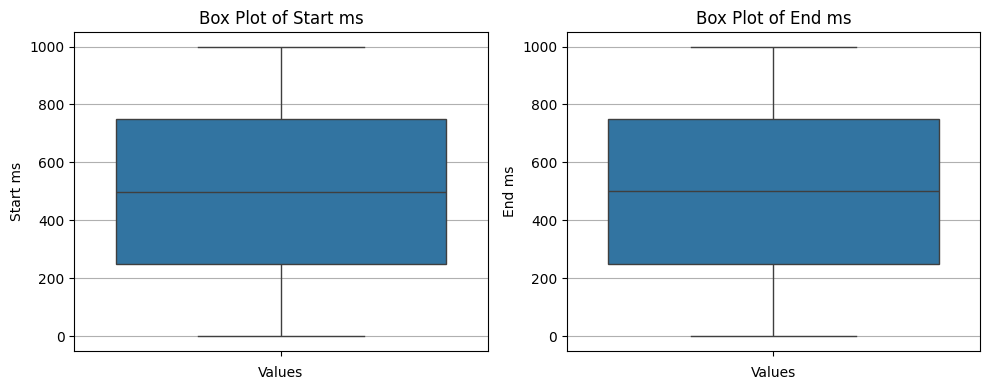

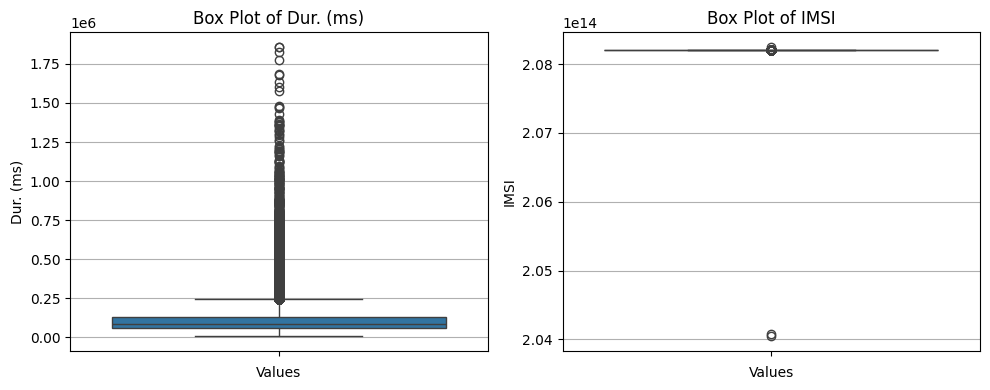

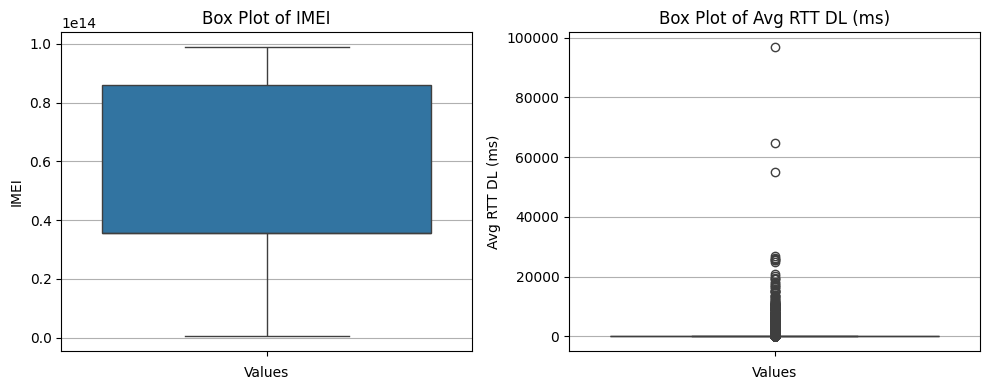

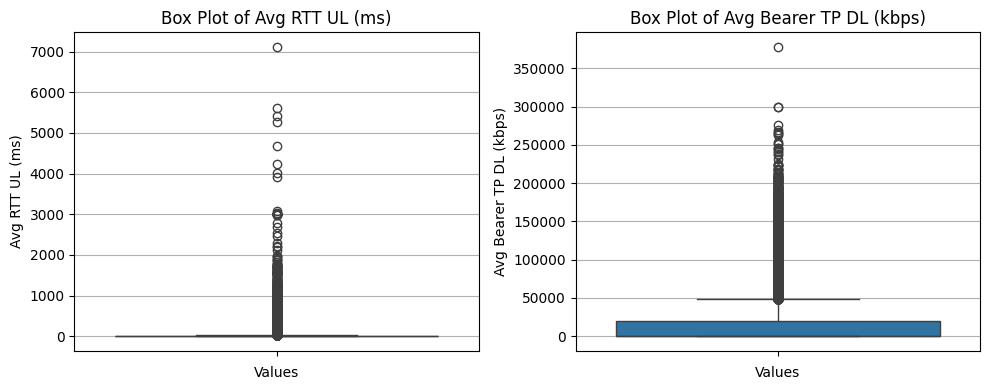

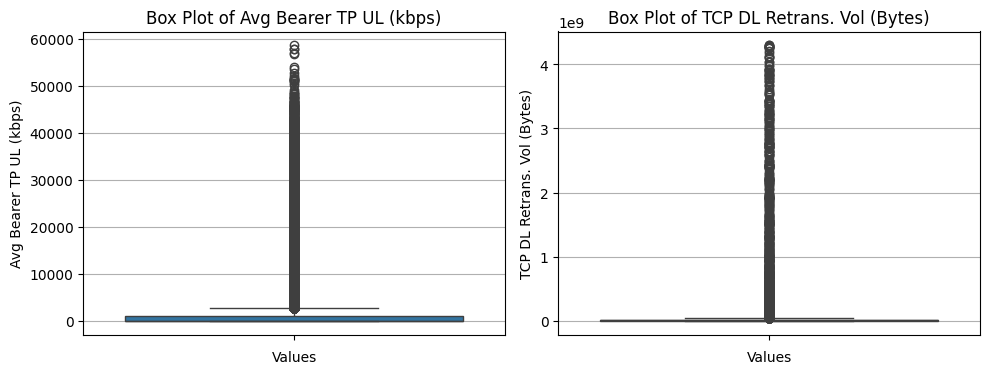

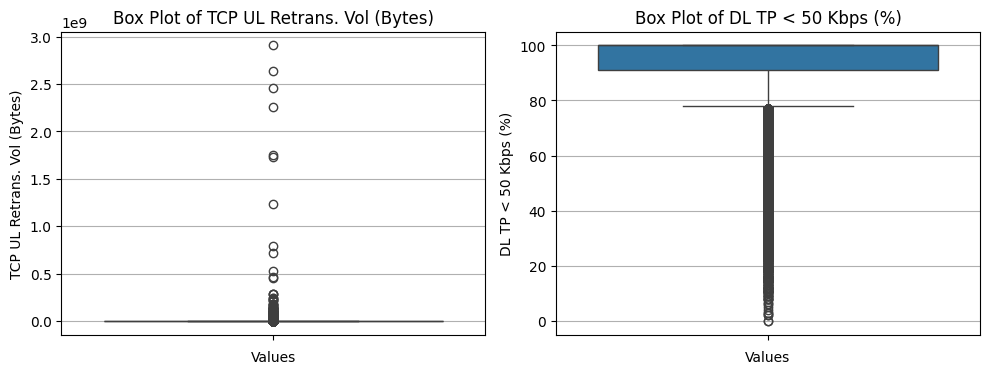

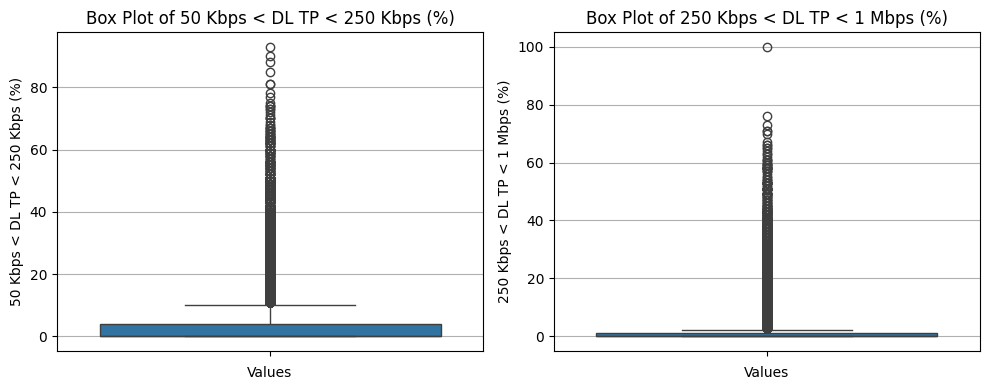

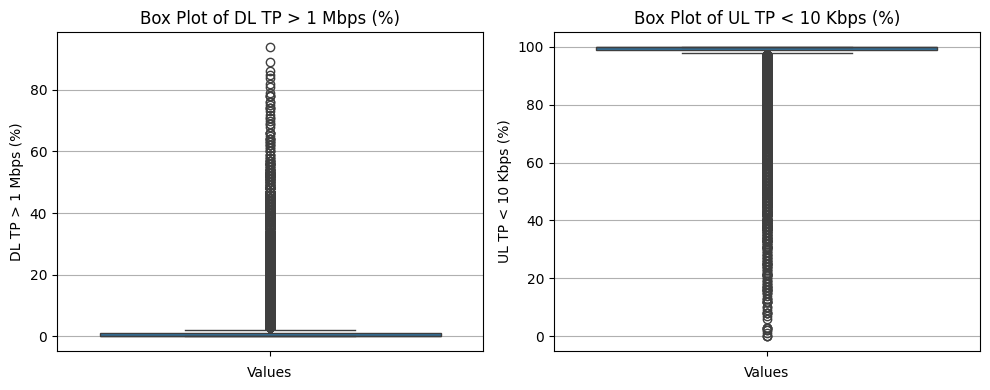

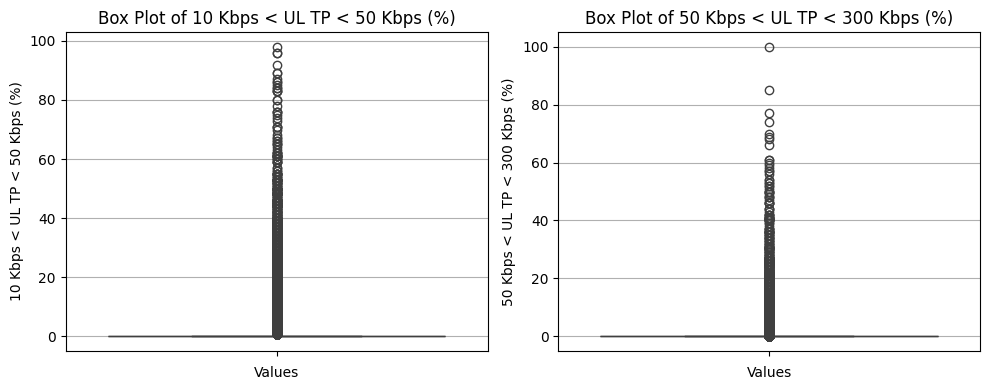

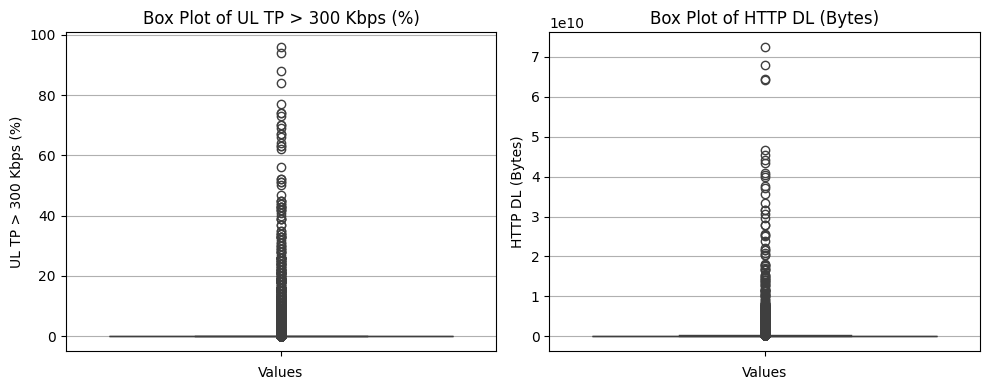

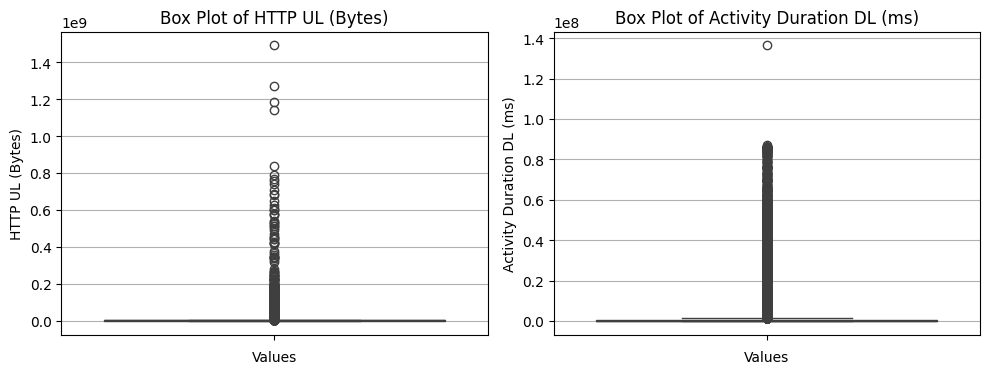

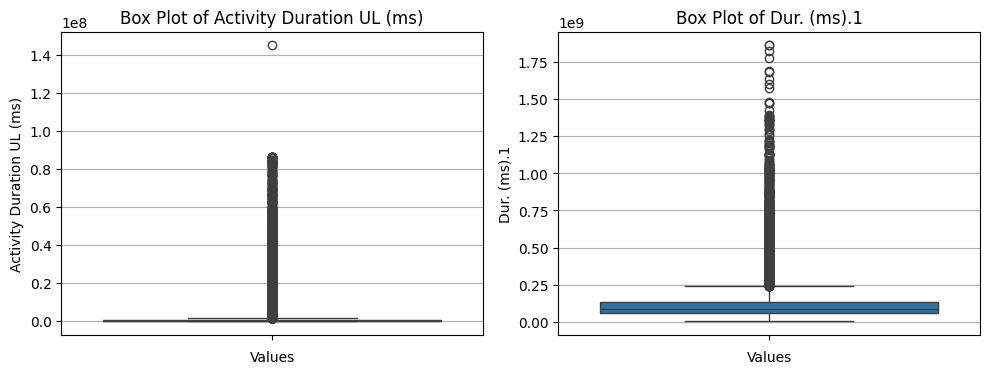

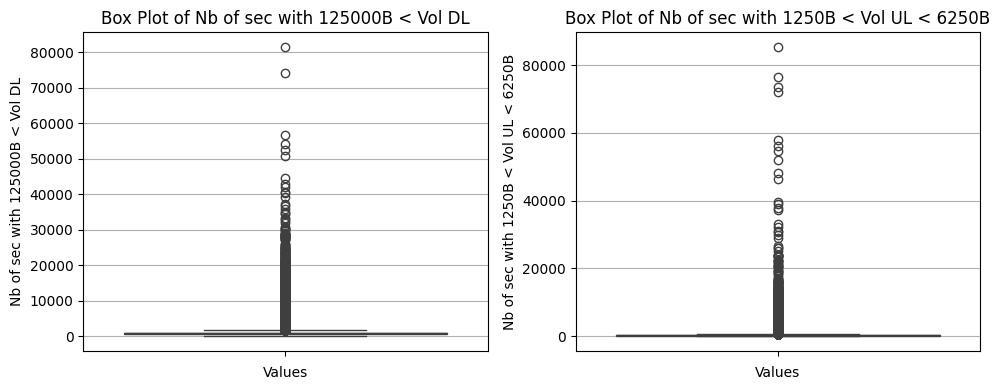

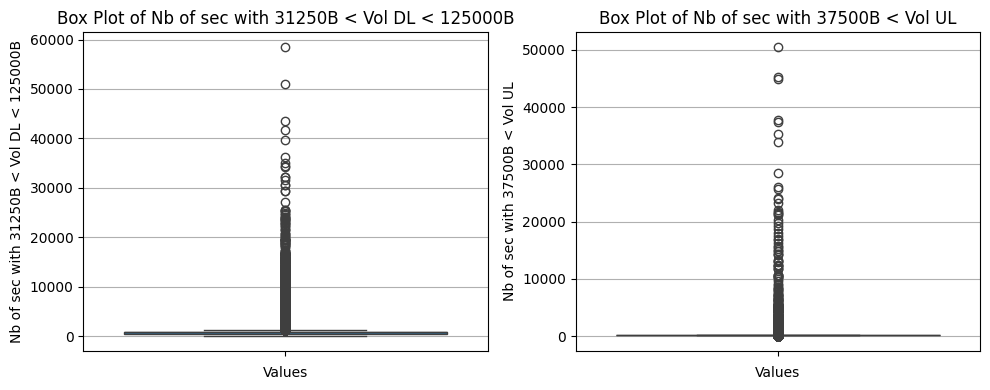

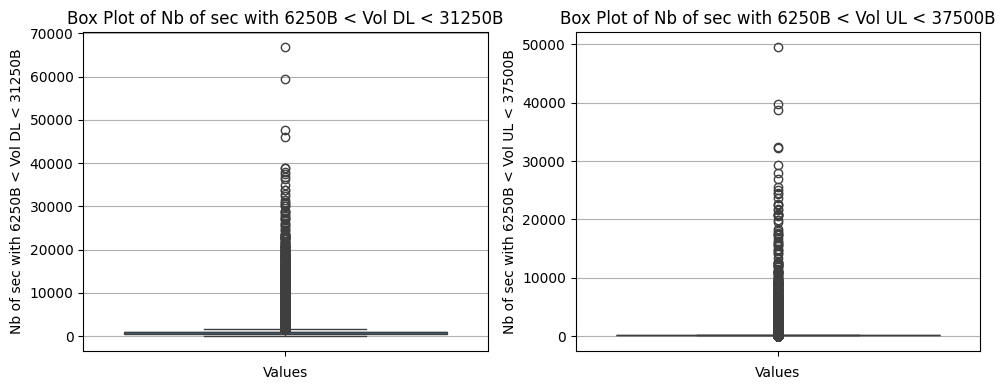

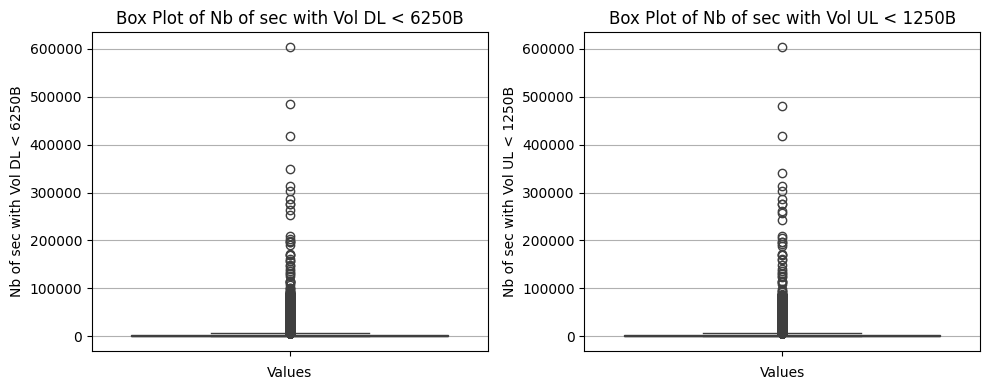

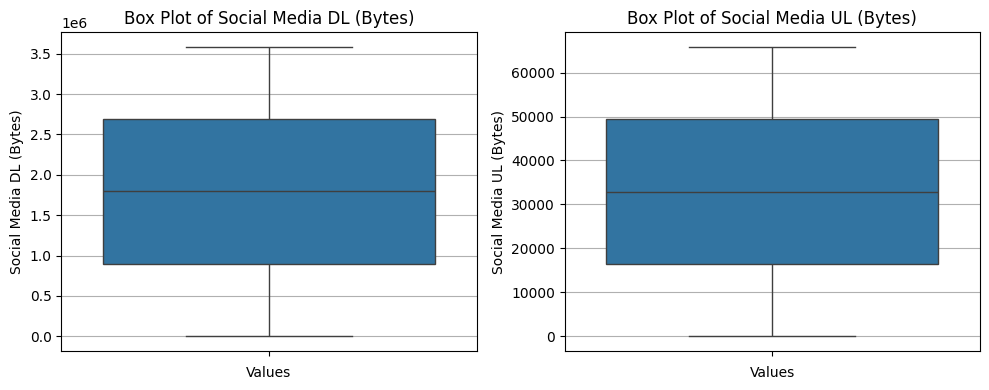

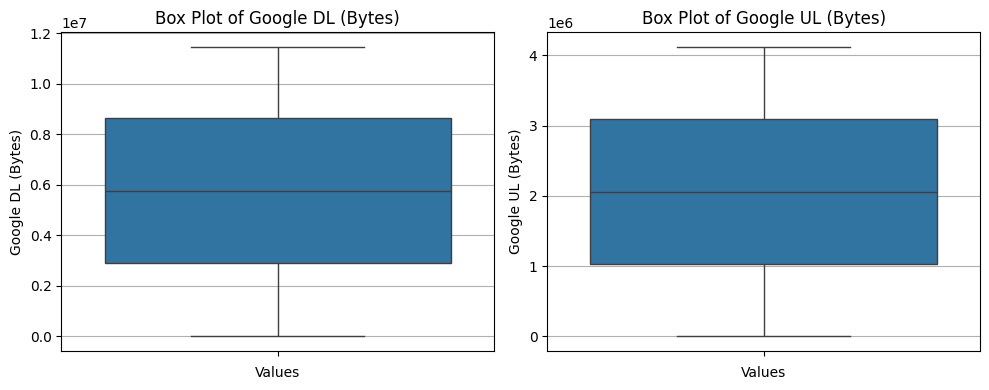

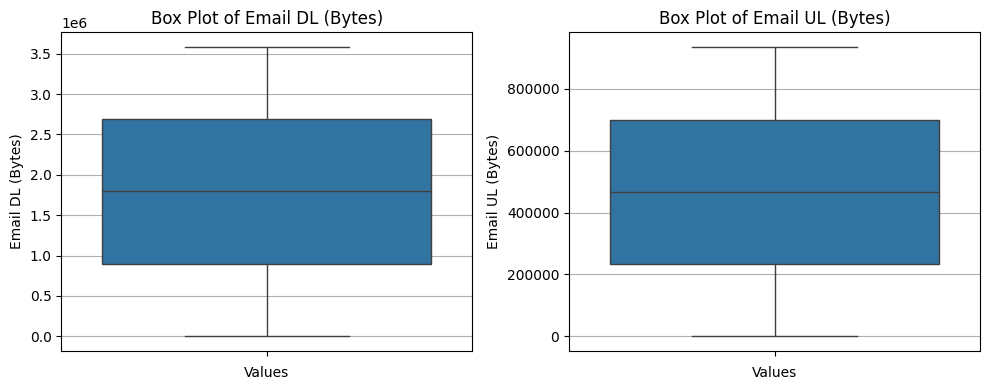

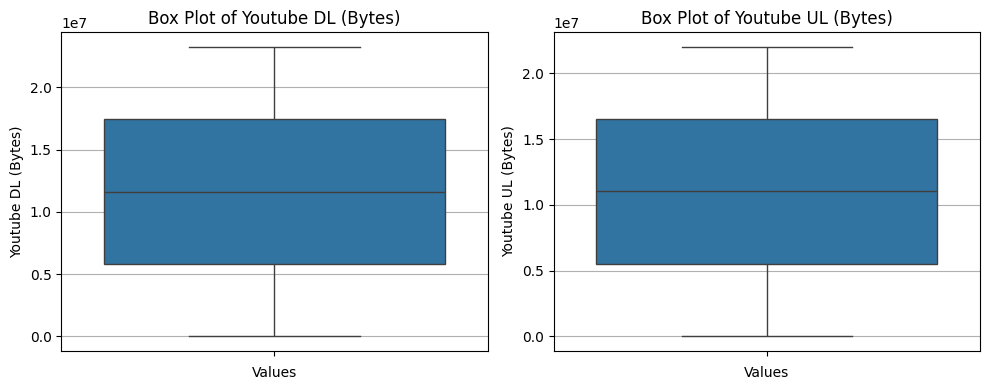

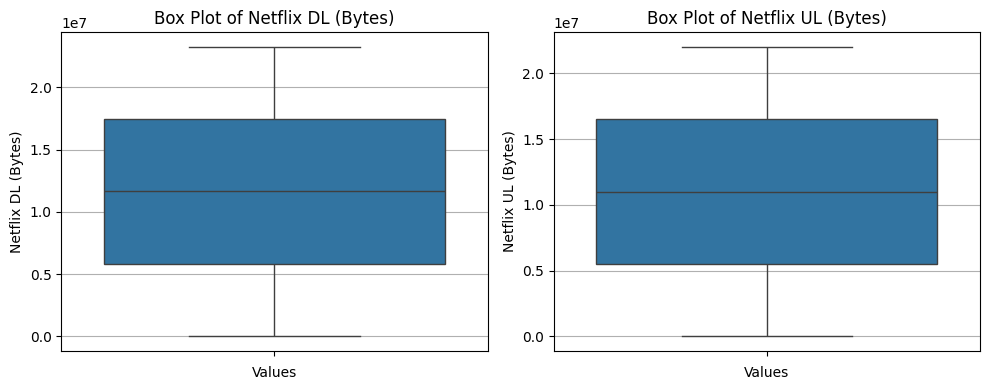

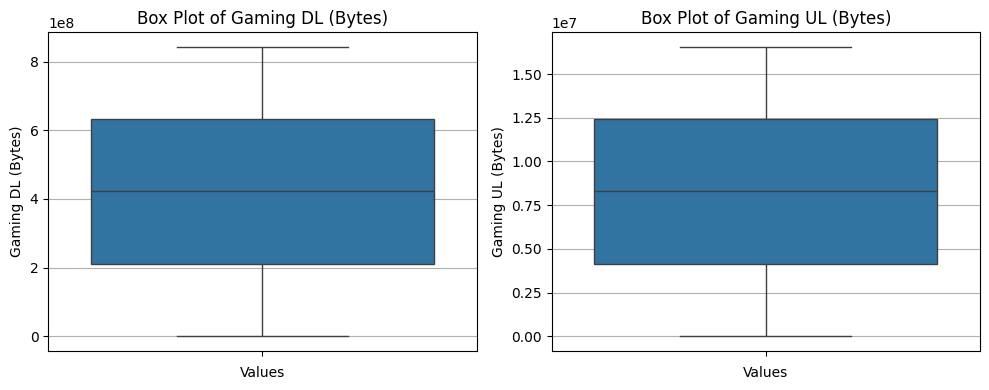

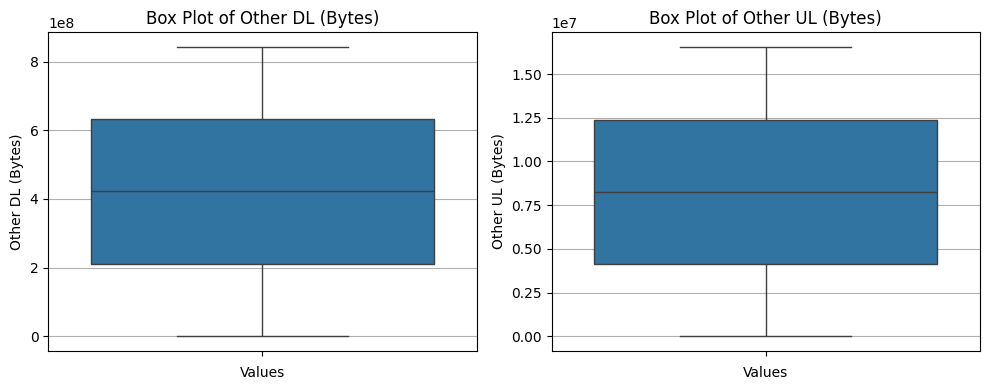

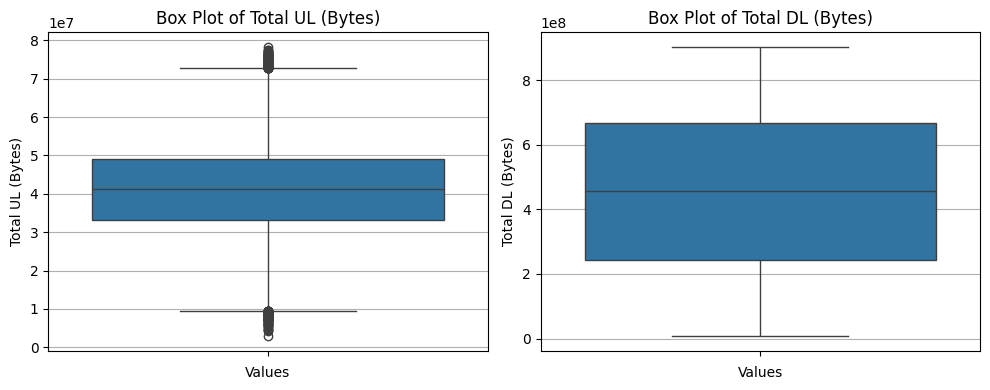

In [17]:
plot_boxplots_side_by_side(telecom_filterd, columns_to_visualize)


In [18]:
# replacing outliers with the mean using IQR 
replace_outliers_iqr(telecom_filterd, columns_to_fill)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,2.602142e+09,2602141968.517799,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09
1,2.602142e+09,2602141968.517799,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09
2,2.602142e+09,2602141968.517799,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09
3,2.602142e+09,2602141968.517799,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2602141968.517799,2602141968.517799,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,2.602142e+09,

In [19]:
telecom_filterd.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,5.462547e+18,1.190391e+09,1.190391e+09,1.190449e+09,1.129540e+14,1.945875e+10,2.319118e+13,1.190391e+09,1.190391e+09,1.190392e+09,1.190391e+09,1.201701e+09,1.190794e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.250160e+09,1.192087e+09,1.190574e+09,1.190534e+09,1.249076e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.190391e+09,1.191364e+09,1.190409e+09,1.193510e+09,1.191506e+09,1.191364e+09,1.190644e+09,1.196691e+09,1.196364e+09,1.196686e+09,1.196350e+09,1.419529e+09,1.194883e+09,1.418357e+09,1.194874e+09,1.212685e+09,1.437191e+09
std,5.446563e+18,1.296337e+09,1.296337e+09,1.296283e+09,1.037227e+14,1.547948e+10,2.504980e+13,1.296337e+09,1.296337e+09,1.296336e+09,1.296337e+09,1.285952e+09,1.295967e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.243604e+09,1.294781e+09,1.296170e+09,1.296206e+09,1.243057e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.296337e+09,1.295443e+09,1.296321e+09,1.293475e+09,1.295314e+09,1.295444e+09,1.296104e+09,1.290561e+09,1.290860e+09,1.290566e+09,1.290873e+09,1.100721e+09,1.292217e+09,1.101671e+09,1.292225e+09,1.275892e+09,1.084742e+09
min,1.250884e+09,0.000000e+00,0.000000e+00,7.142000e+03,1.250884e+09,1.250884e+09,1.250884e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.331406e+06,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.100000e+01,0.000000e+00,2.070000e+02,3.100000e+01,1.400000e+01,2.000000e+00,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,9.046209e+06
25%,2.602142e+09,4.620000e+02,4.580000e+02,9.669950e+04,2.602142e+09,2.602142e+09,2.602142e+09,4.300000e+01,5.000000e+00,4.400000e+01,4.800000e+01,2.100681e+07,7.710518e+05,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.161443e+08,3.286790e+06,1.820

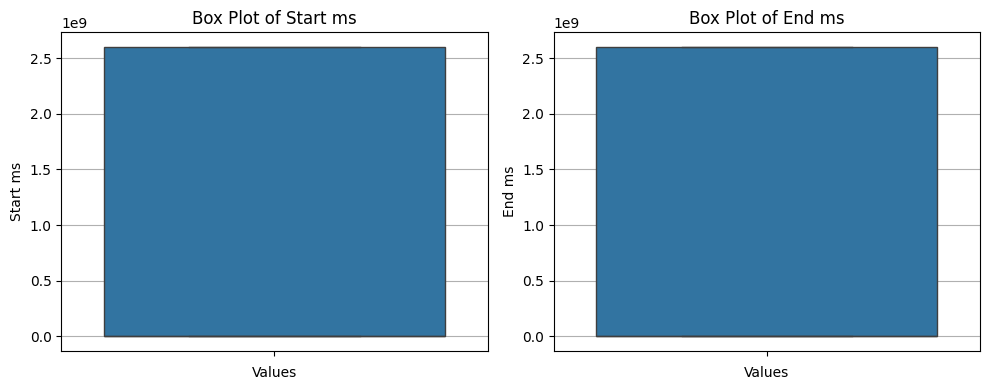

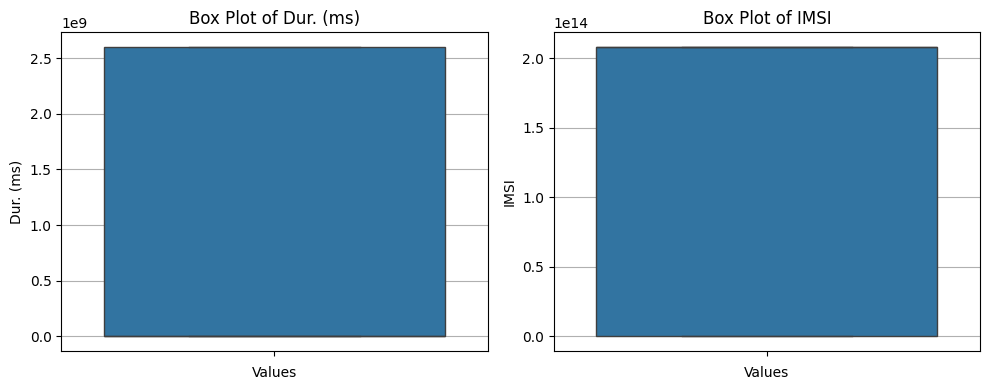

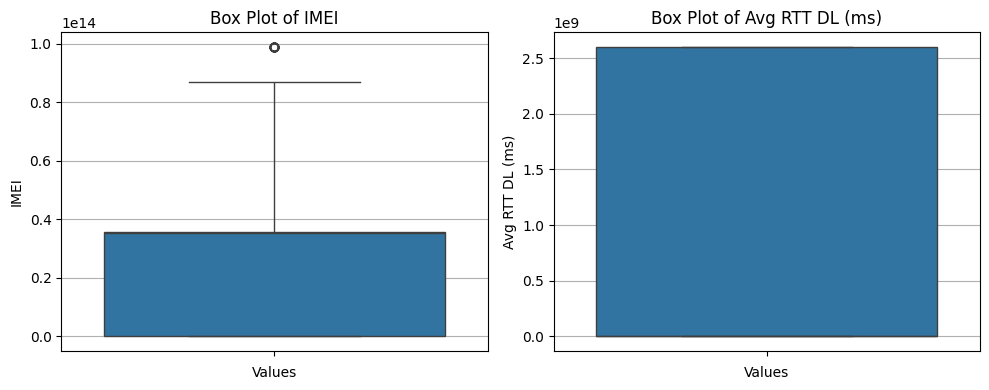

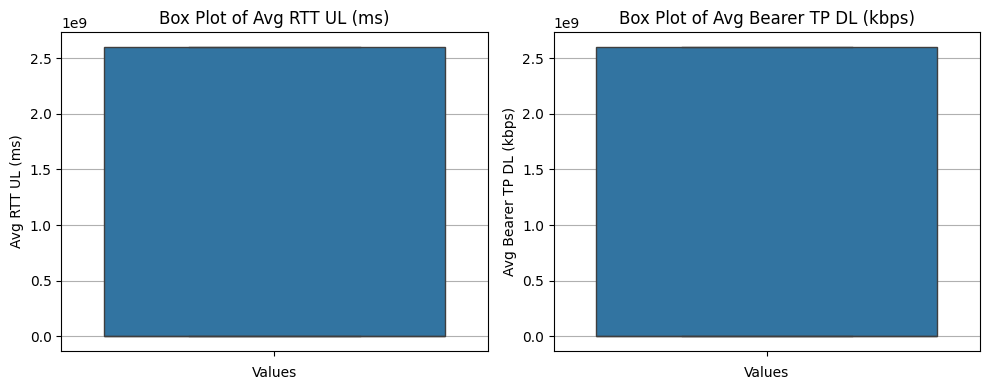

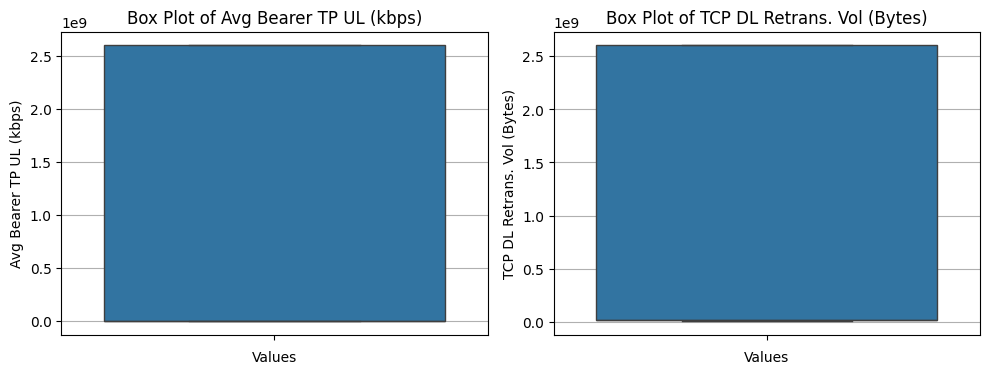

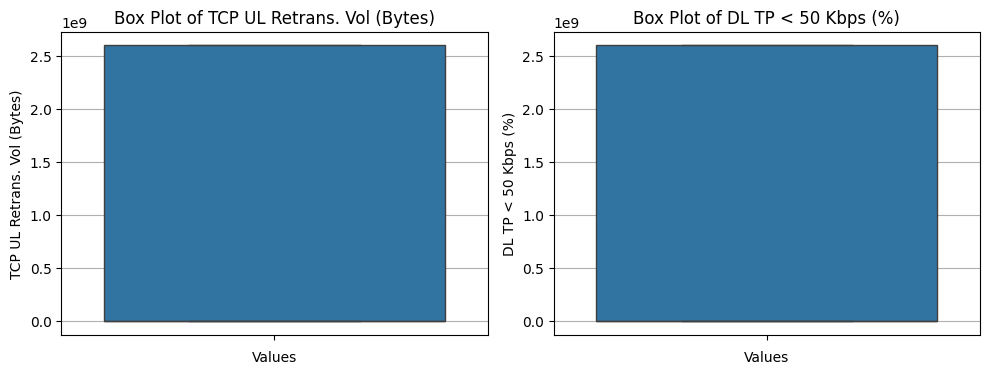

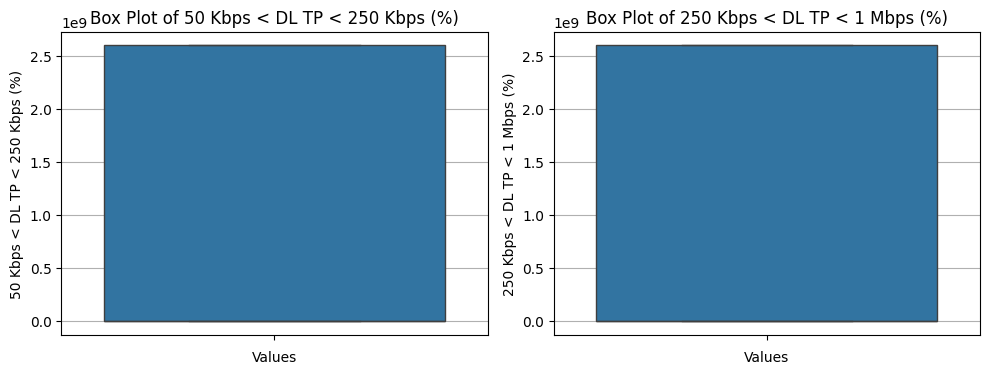

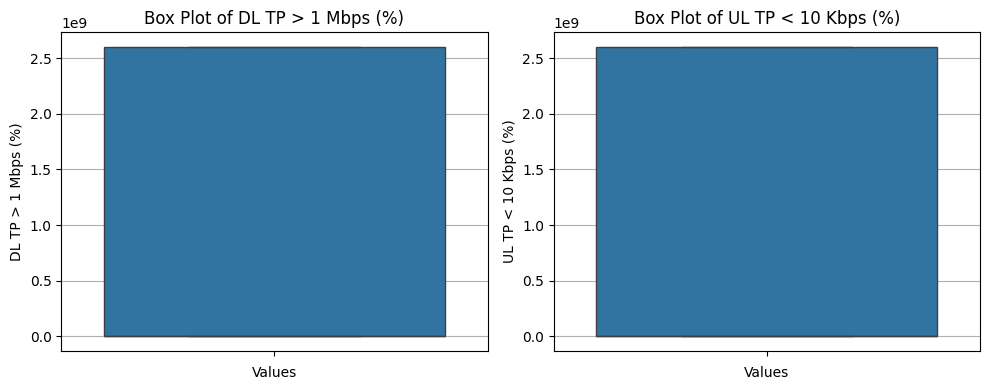

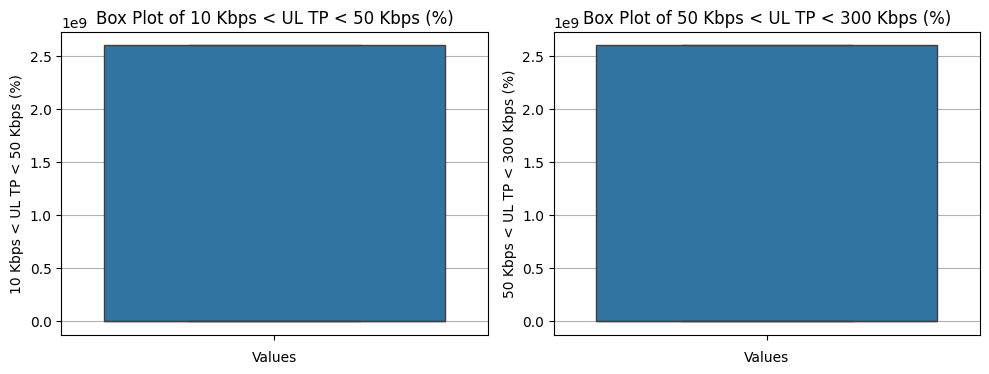

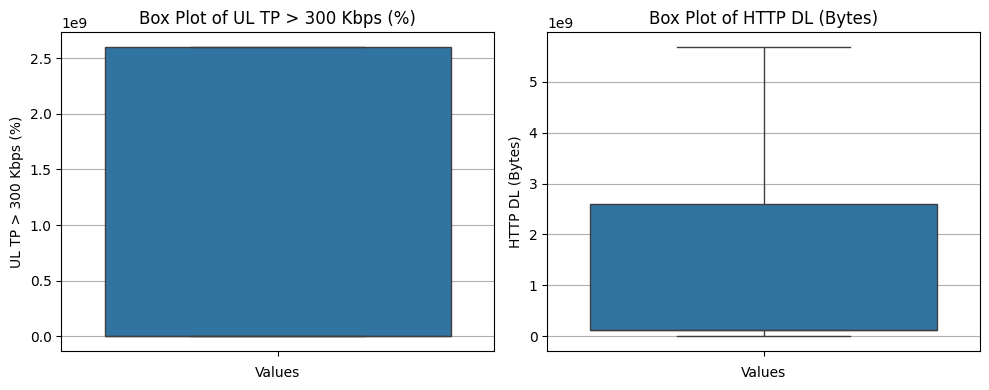

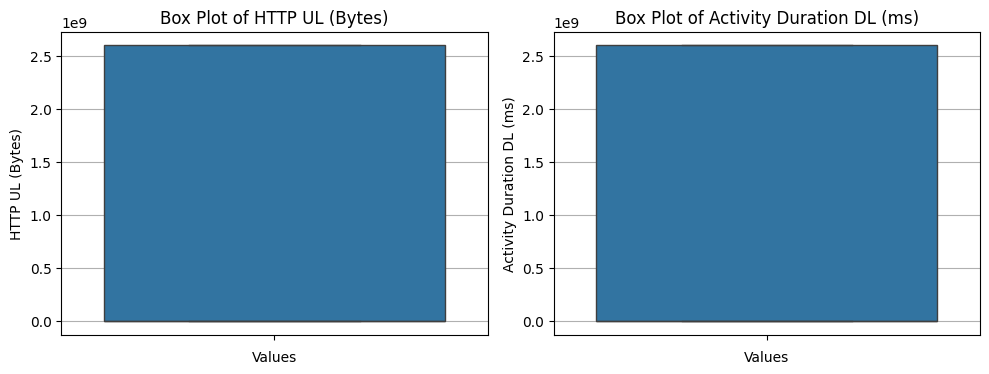

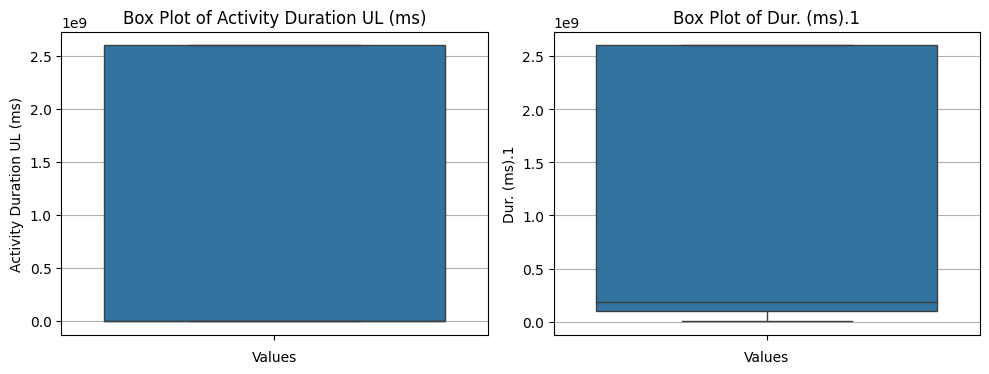

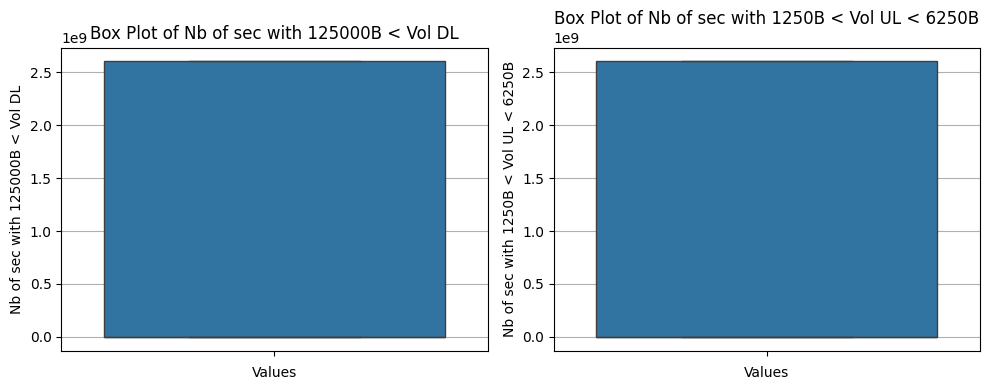

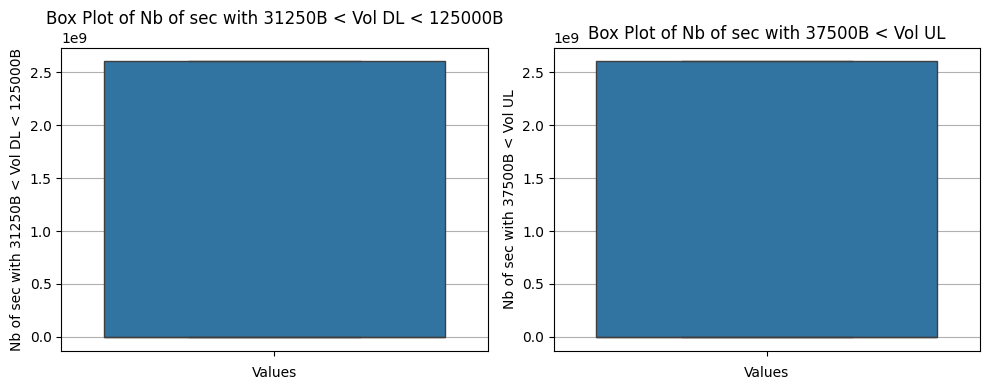

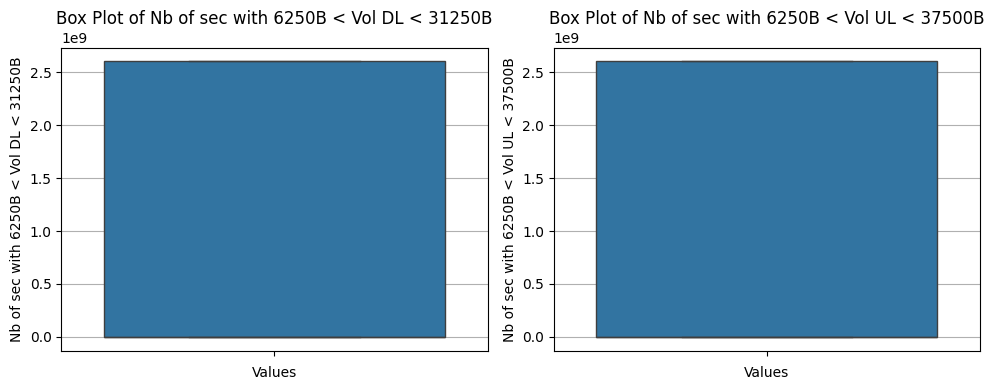

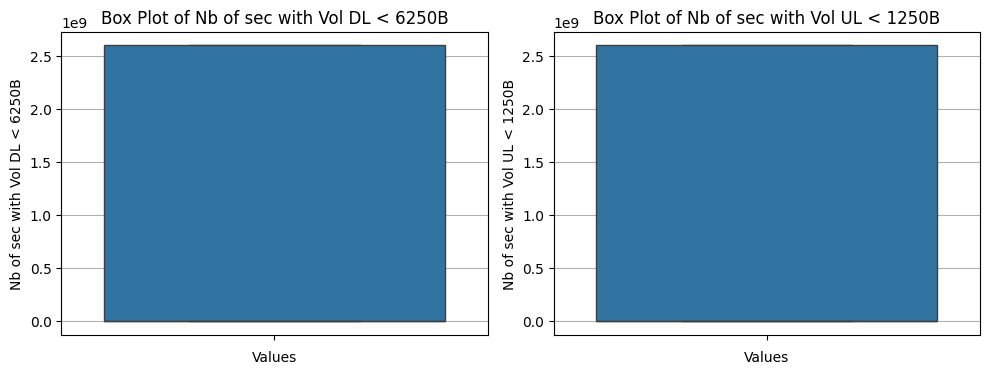

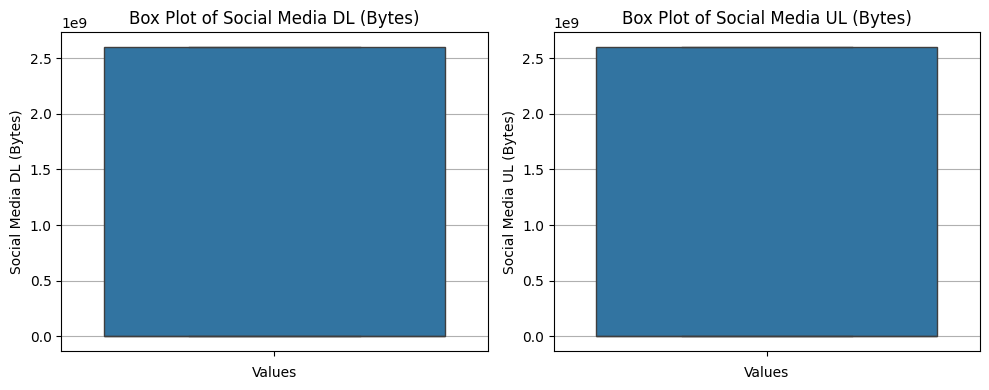

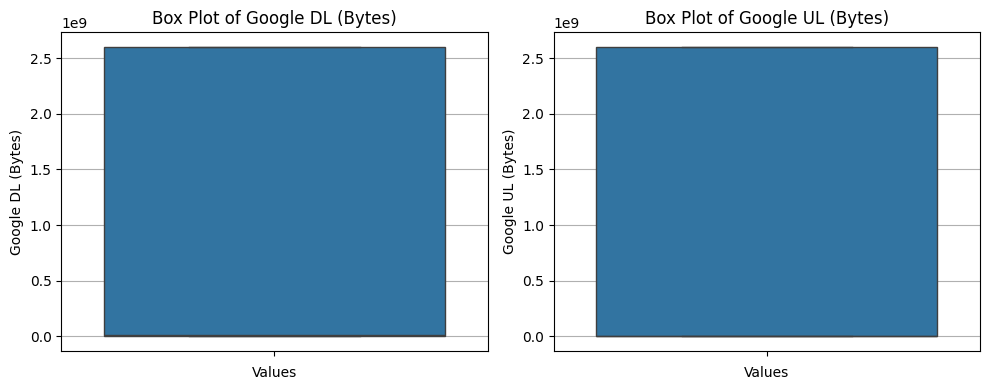

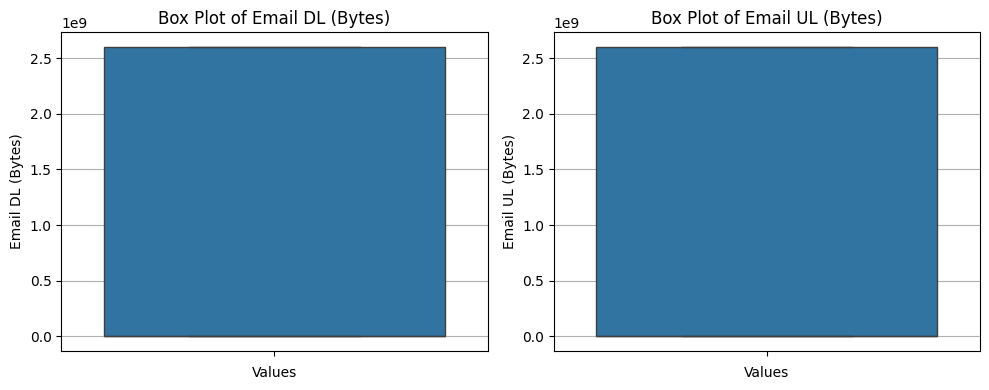

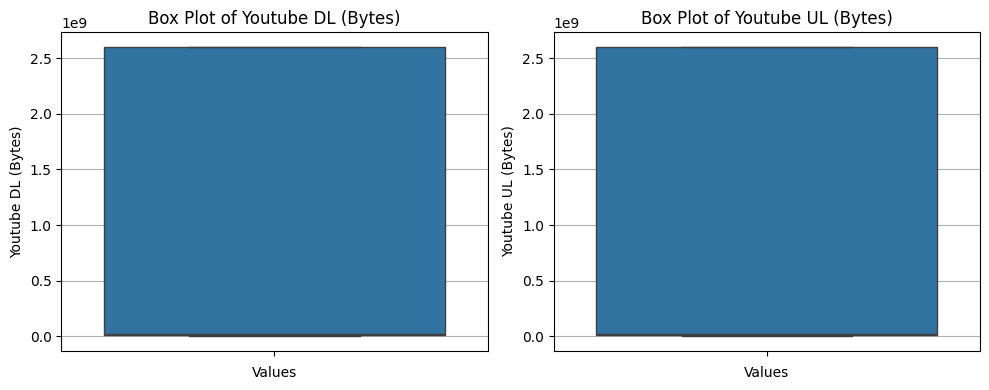

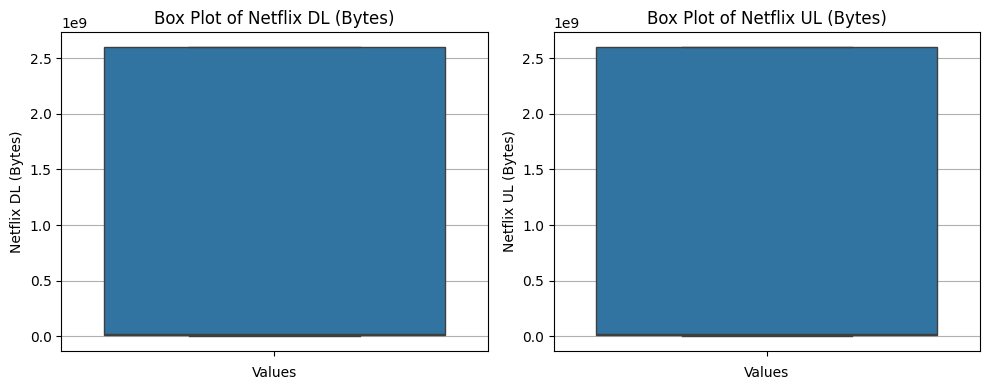

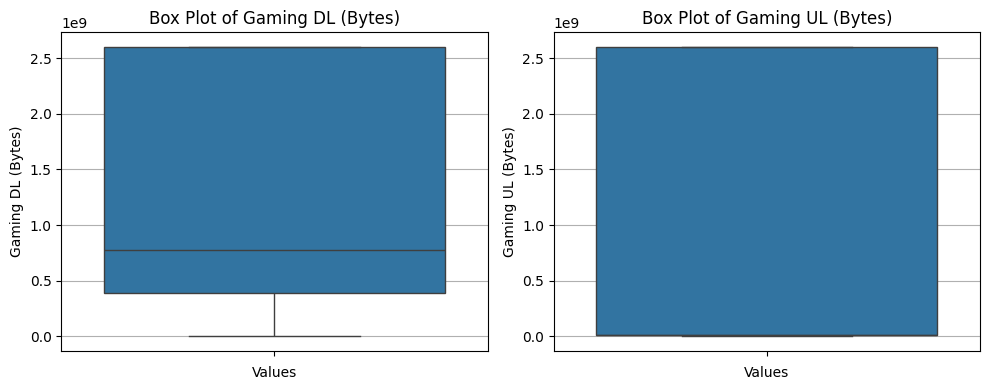

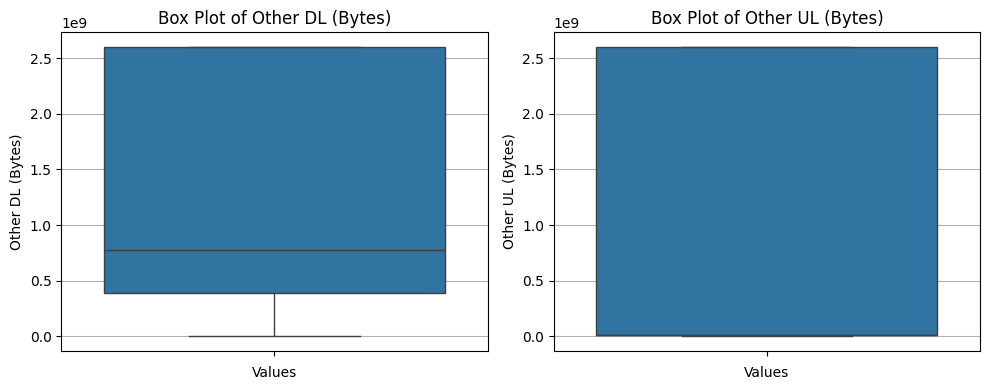

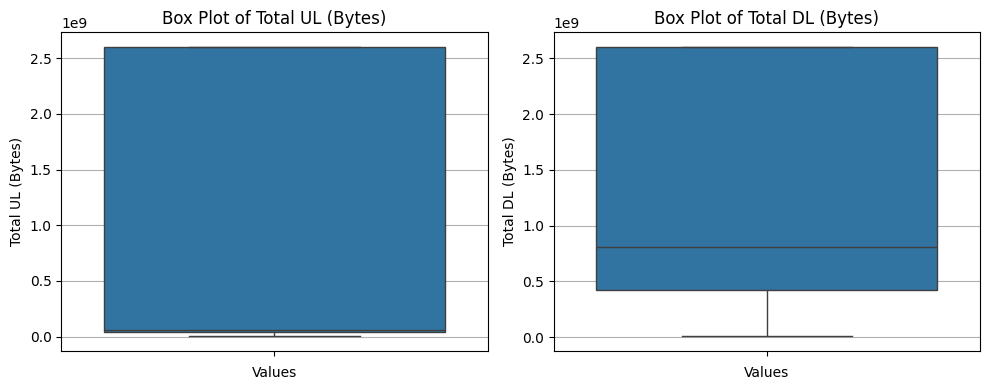

In [20]:
plot_boxplots_side_by_side(telecom_filterd, columns_to_visualize)


In [22]:
telecom_filterd.to_csv('../data/telecom_filterd.csv', index=False)
